<a href="https://colab.research.google.com/github/alberehap/Project-ML/blob/main/01_EDA_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (10000, 8)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


None

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9521.000000,9467.000000,9498.000000,9540
mean,3.028463,2.949984,8.924352,2023-07-01 23:00:31.698113280
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.419007,1.278450,6.009919,NaN


,missing_count,missing_percent
Location,3265,32.65
Payment Method,2579,25.79
Price Per Unit,533,5.33
Total Spent,502,5.02
Quantity,479,4.79
Transaction Date,460,4.60
Item,333,3.33
Transaction ID,0,0.00


Number of duplicate rows: 0


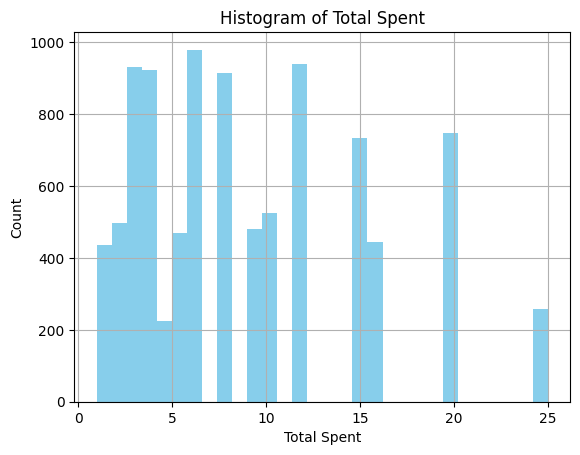

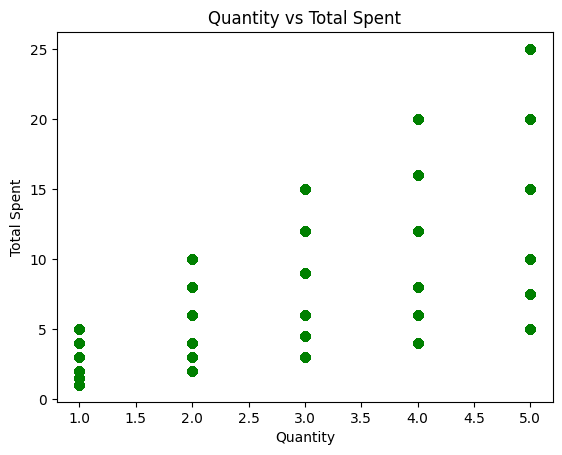

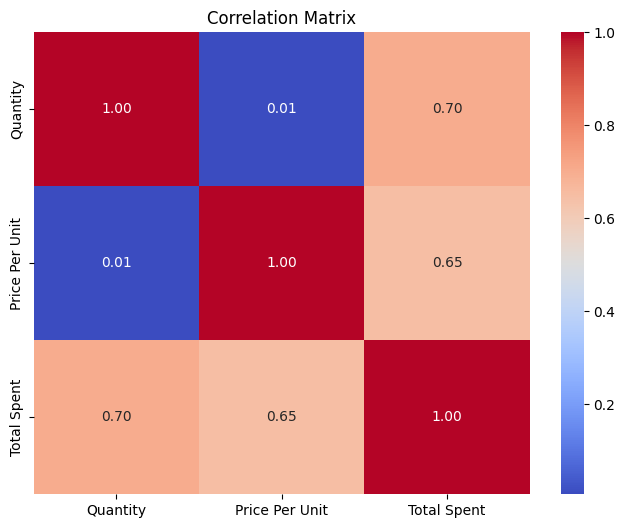

In [9]:
# ====== 1. Import Libraries ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ====== 2. Load Dataset ======
df = pd.read_csv('/content/sample_data/dirty_cafe_sales.csv')

# ====== Data Cleaning: Convert to Numeric and Datetime ======
# Convert 'Quantity', 'Price Per Unit', 'Total Spent' to numeric, coercing errors
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Convert 'Transaction Date' to datetime, coercing errors
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# ====== 3. Basic Info ======
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())

# ====== 4. Missing Values Overview ======
missing_count = df.isnull().sum()
missing_percent = 100 * missing_count / len(df)
missing_overview = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

# Ensure the directory exists before saving
os.makedirs('../results/tables', exist_ok=True)
missing_overview.to_csv('../results/tables/missing_overview_clustering.csv')
display(missing_overview.head(10))

# ====== 5. Duplicate Rows ======
dups = df.duplicated().sum()
print("Number of duplicate rows:", dups)
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.to_csv('../results/tables/duplicate_rows_clustering.csv', index=False)

# ====== 6. Visualizations ======
os.makedirs('../results/figures', exist_ok=True)

# Histogram: Total Spent
plt.figure()
df['Total Spent'].dropna().hist(bins=30, color='skyblue') # Drop NaNs before plotting
plt.title('Histogram of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Count')
plt.savefig('../results/figures/hist_total_spent.png')
plt.show()

# Scatter: Quantity vs Total Spent
plt.figure()
df_cleaned_for_scatter = df.dropna(subset=['Quantity', 'Total Spent']) # Drop NaNs for scatter plot
plt.scatter(df_cleaned_for_scatter['Quantity'], df_cleaned_for_scatter['Total Spent'], alpha=0.6, color='green')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.title('Quantity vs Total Spent')
plt.savefig('../results/figures/scatter_qty_total.png')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
num_cols = df.select_dtypes(include=[np.number])
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../results/figures/corr_matrix.png')
plt.show()


# New Section